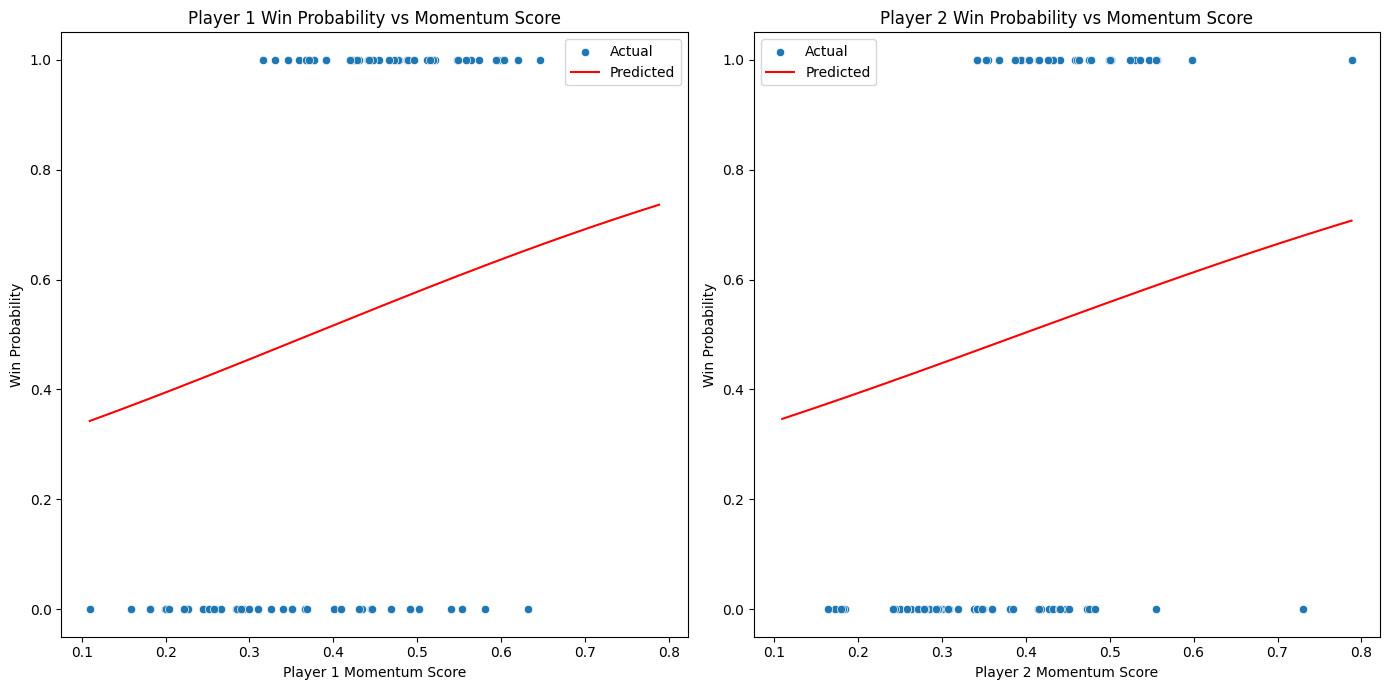

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '女子Q2指标_带势头评分.xlsx'
data = pd.read_excel(file_path)

# Prepare the data for logistic regression model
X1 = data['选手1势头评分'].values.reshape(-1, 1)
y1 = data['选手1是否获胜'].values
X2 = data['选手2势头评分'].values.reshape(-1, 1)
y2 = data['选手2是否获胜'].values

# Create logistic regression models for Player 1 and Player 2
log_reg_model_1 = LogisticRegression()
log_reg_model_2 = LogisticRegression()

# Fit the models
log_reg_model_1.fit(X1, y1)
log_reg_model_2.fit(X2, y2)

# Create a sequence of momentum scores to plot the regression line
momentum_scores = np.linspace(start=min(data['选手1势头评分'].min(), data['选手2势头评分'].min()), 
                              stop=max(data['选手1势头评分'].max(), data['选手2势头评分'].max()), 
                              num=500).reshape(-1, 1)

# Predict the probabilities of winning for each momentum score
probabilities_1 = log_reg_model_1.predict_proba(momentum_scores)[:,1]
probabilities_2 = log_reg_model_2.predict_proba(momentum_scores)[:,1]

# Plot the results
plt.figure(figsize=(14, 7))

# Plot for Player 1
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['选手1势头评分'], y=data['选手1是否获胜'], label='Actual')
sns.lineplot(x=momentum_scores.ravel(), y=probabilities_1, color='red', label='Predicted')
plt.title('Player 1 Win Probability vs Momentum Score')
plt.xlabel('Player 1 Momentum Score')
plt.ylabel('Win Probability')

# Plot for Player 2
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['选手2势头评分'], y=data['选手2是否获胜'], label='Actual')
sns.lineplot(x=momentum_scores.ravel(), y=probabilities_2, color='red', label='Predicted')
plt.title('Player 2 Win Probability vs Momentum Score')
plt.xlabel('Player 2 Momentum Score')
plt.ylabel('Win Probability')

plt.tight_layout()
plt.show()
